###Simple Genetic Algorithm in Python --Addendum

#####A brief addendum to my previous post <a href="Simple-Genetic-Algorithm-in-15-lines-of-Python/">"Simple Genetic Algorithm In 15 Lines Of Python"</a>

<p>First, I'd like to apologize for jumping on the here's-how-to-implement-X-in-Y-lines-of-code bandwagon in my previous post. As many people have pointed out, who care's how many lines of code it takes to implement X as long as it's well-explained?</p>

<p>Okay, now that I've cleansed my soul of that sin, let's get to what this addendum is all about. Basically this is just a quick demonstration of the same genetic algorithm (GA) from my last post except instead of using it to find the weights for that ultra-simple 2-layer neural network, I've just modified it slightly to find the weights for a 3 layer XOR neural network (yes, I'm tired of XOR too, but it's just soo useful). So this neural network has a total of 13 weights: 3x3 weights for the input-to-hidden layer, and 4x1 weights for the hidden-to-output layer.
</p>

<p><em>__Why is this necessary?__</em> I received some comments that suggested doubt over whether the genetic algorithm is actually robust. I think that's valid because the problem it was solving was really too easy. With such a small search space, there was likely a good solution in the very first, randomly intialized, generation. Thus it is a reasonable suspicion that our mutation and 'mating' process, for example, weren't actually contributing to solving the problem. Extending our search space from a 3-element vector to a 13-element vector significantly increases the difficulty of the problem and we can see the GA utilizing all it's evolutionary 'tools,' so to speak.</p>

<p> We'll begin by running it with some optimized parameters I figured out empirically, but then we'll explore the effects of varying the parameters and hopefully convince ourselves the GA is actually 'evolving' toward an optimal solution versus doing something less interesting.</p>

<p>
I'm not going to go line-by-line and explain what's going on here, because I really haven't changed much from my previous post and this isn't meant to be a tutorial, it's an exploration. Here's the code for the XOR neural network (which I store in a separate file and import into the GA file).
</p>

In [70]:
import numpy as np
import math

X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) #the third element in each tuple is the bias value (1)
y = np.array([[0, 1, 1, 0]]).T
init_theta = 10*(np.random.random((13,1)) - 0.5) #lazy way to initialize

def runForward(X, theta):
	theta1 = np.array(theta[:9]).reshape(3,3)
	theta2 = np.array(theta[9:]).reshape(4,1)
	h1 = sigmoid(np.dot(X, theta1)) #4x3 * 3x3 = 4x3
	h1_bias = np.insert(h1, 3, [1,1,1,1], axis=1)
	output = sigmoid(np.dot(h1_bias, theta2)) #4x4 * 4x1 = 4x1
	return output
	#4x3 * 3x1 = 4x1
def costFunction(X, y, theta):
	m = float(len(X))
	hThetaX = np.array(runForward(X, theta))
	return np.sum(np.abs(y - hThetaX))
def sigmoid(x): return 1 / (1 + np.exp(- x))

def demoRun():
	print("Random theta: \n%s\n" % (np.round(runForward(X, init_theta), 2)))
	print("Cost: %s\n" % (costFunction(X,y, init_theta)))
    #this "optimal theta" was found from a previous run of the GA
	theta = np.array([-10.27649069, -14.03, 10.45888659, 9.12, 14.87, -21.50294038, 1.85, -13.28, 
                       -0.15360052, -11.21345025, 35.77912716, 11.05, -2.49589577])
	print("Optimal theta: \n%s\n" % (np.round(runForward(X, theta), 2)))
	print("Cost: %s\n" % (costFunction(X, y, theta)))
demoRun()

Random theta: 
[[ 0.71]
 [ 0.53]
 [ 0.74]
 [ 0.7 ]]

Cost: 2.13729248257

Optimal theta: 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]

Cost: 0.00107762026703



Okay, just making sure the neural network works properly...and it does...

Keep in mind that we're working with 'unrolled' theta (weight) vectors. Unlike my previous post that only had one set of weights between the two layers, now we have 3 layers but our GA is only going to generate and use 1-dimensional vectors of length 13, then our neural network will just slice that up to get two weight vectors, theta1 and theta2. I.e. theta1 = the first 9 elements reshaped to a 3x3 matrix, and theta2 = the last 4 elements reshaped to a 4x1 matrix.

Here's the code for the GA. It's nearly exactly the same as the GA code posted at the bottom (the more readable version) of the previous post.

I've made the following modifications to the paremeters:

1. Reduced the initial population (initPop) size to 80. Why? To reduce chance of getting a good solution from the random first generation, I want to make sure to show off the evolutionary process.
2. Reduced mutation rate (mutRate) to 0.01 = 1%. I did this from experimenting.
3. Changed the number of generations (numGen) to 30
4. Increased the solution length from 3 to 13 (since our new unrolled theta vector is of length 13)

Alright, let's watch it run with those parameters:

Best Sol'n:
[[-10.27649069 -14.03        10.45888659   9.12        14.87       -21.50294038
    1.85       -13.28        -0.15360052 -11.21345025  35.77912716  11.05
   -2.49589577]]
Cost:0.00107762027157
When X = 
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


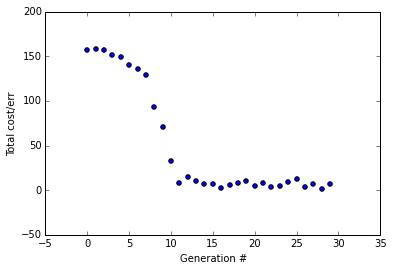

In [15]:
import matplotlib as plt
%matplotlib inline
import random as rn, numpy as np
import NeuralNetXOR as NN
# [Initial population size, mutation rate (=1%), num generations (30), solution length (30), # winners/per gen]
initPop, mutRate, numGen, solLen, numWin = 80, 0.01, 30, 13, 10
#initialize current population to random values within range
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(initPop, solLen),replace=False) 
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((initPop, 2)) #1st col is indices, 2nd col is cost
for i in range(numGen): #iterate through num generations
    #Create vector of all errors from cost function for each solution
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].T))]) for x in range(initPop)])
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((numWin, solLen))
	for n in range(len(winners)): #for n in range(10)
		selected = np.random.choice(range(len(fitVec)), numWin/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners #populate new gen with winners
	duplicWin = np.zeros((((initPop - len(winners))),winners.shape[1]))
	for x in range(winners.shape[1]): #for each col in winners (3 cols)
        #Duplicate winners (20x3 matrix) 3 times to create 80x3 matrix, then shuffle columns
		numDups = ((initPop - len(winners))/len(winners)) #num times to duplicate to fill rest of nextPop
		duplicWin[:, x] = np.repeat(winners[:, x], numDups, axis=0)#duplicate each col
		duplicWin[:, x] = np.random.permutation(duplicWin[:, x]) #shuffle each col ("crossover")
    #Populate the rest of the generation with offspring of mating pairs
	nextPop[len(winners):] = np.matrix(duplicWin)
    #Create a mutation matrix, mostly 1s, but some elements are random numbers from a normal distribution
	mutMatrix = [np.float(np.random.normal(0,2,1)) if rn.random() < mutRate else 1 for x in range(nextPop.size)]
    #randomly mutate part of the population by multiplying nextPop by our mutation matrix
	nextPop = np.multiply(nextPop, np.matrix(mutMatrix).reshape(nextPop.shape)) 
	curPop = nextPop
plt.pyplot.ylabel('Total cost/err')
plt.pyplot.xlabel('Generation #')
best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
result = np.round(NN.runForward(X, best_soln.T))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.T))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

You can see it converges after about 10 generations, a little over twice as long as it took for the simple 2-layer neural network despite our search space is more than 4 times bigger. With the parameters I've used here, it properly converges almost every time I run it.
 
Now I want to demonstrate what it looks like when we change the mutation rate to __10%__ (I've removed all the comments to reduce the code size a bit).

Best Sol'n:
[[ -8.01259712e+00   3.14587352e+01   1.40600000e+01   6.65543028e-02
    1.01012825e+02  -8.45144543e+01   8.72955079e+00  -1.04300000e+01
   -4.53000000e+00  -1.74629574e+01   2.64781112e+01   6.63253301e+01
   -1.97971192e+00]]
Cost:1.00087335923
When X = 
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


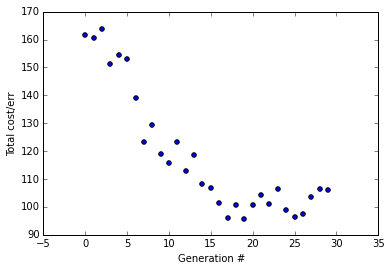

In [73]:
import matplotlib as plt, random as rn, numpy as np, NeuralNetXOR as NN
%matplotlib inline
initPop, mutRate, numGen, solLen, numWin = 80, 0.10, 30, 13, 10
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(initPop, solLen),replace=False) 
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((initPop, 2))
for i in range(numGen):
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].T))]) for x in range(initPop)])
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((numWin, solLen))
	for n in range(len(winners)):
		selected = np.random.choice(range(len(fitVec)), numWin/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners
	duplicWin = np.zeros((((initPop - len(winners))),winners.shape[1]))
	for x in range(winners.shape[1]):
		numDups = ((initPop - len(winners))/len(winners))
		duplicWin[:, x] = np.repeat(winners[:, x], numDups, axis=0)
		duplicWin[:, x] = np.random.permutation(duplicWin[:, x])
	nextPop[len(winners):] = np.matrix(duplicWin)
	mutMatrix = [np.float(np.random.normal(0,2,1)) if rn.random() < mutRate else 1 for x in range(nextPop.size)]
	nextPop = np.multiply(nextPop, np.matrix(mutMatrix).reshape(nextPop.shape)) 
	curPop = nextPop
plt.pyplot.ylabel('Total cost/err')
plt.pyplot.xlabel('Generation #')
best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
result = np.round(NN.runForward(X, best_soln.T))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.T))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

With a mutation rate of 10% the error trends downward but fails to converge (trust me, I ran it a few times, it almost never converges). This mutation rate is too big, any good solution is likely to just get destroyed by the mutation process.

Let's try a really low mutation rate, actually let's just make the mutation rate __0%__.

Best Sol'n:
[[  5.08 -12.1    6.61   0.48  14.44  -8.22  -9.47   1.94   8.45 -13.2
   -4.37  -4.07   6.79]]
Cost:0.92032599599
When X = 
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


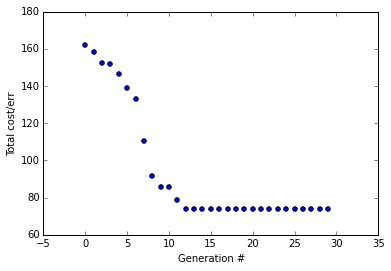

In [77]:
import matplotlib as plt, random as rn, numpy as np, NeuralNetXOR as NN
%matplotlib inline
initPop, mutRate, numGen, solLen, numWin = 80, 0.0, 30, 13, 10
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(initPop, solLen),replace=False) 
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((initPop, 2))
for i in range(numGen):
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].T))]) for x in range(initPop)])
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((numWin, solLen))
	for n in range(len(winners)):
		selected = np.random.choice(range(len(fitVec)), numWin/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners
	duplicWin = np.zeros((((initPop - len(winners))),winners.shape[1]))
	for x in range(winners.shape[1]):
		numDups = ((initPop - len(winners))/len(winners))
		duplicWin[:, x] = np.repeat(winners[:, x], numDups, axis=0)
		duplicWin[:, x] = np.random.permutation(duplicWin[:, x])
	nextPop[len(winners):] = np.matrix(duplicWin)
	mutMatrix = [np.float(np.random.normal(0,2,1)) if rn.random() < mutRate else 1 for x in range(nextPop.size)]
	nextPop = np.multiply(nextPop, np.matrix(mutMatrix).reshape(nextPop.shape)) 
	curPop = nextPop
plt.pyplot.ylabel('Total cost/err')
plt.pyplot.xlabel('Generation #')
best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
result = np.round(NN.runForward(X, best_soln.T))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.T))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

Here the error trends downward and just flatlines every time. From running this a few times, it converges most of the time but not as frequently as with a mutation rate of 1%. Also, you'll notice that the total error at the end is __0.92__ and it generally stays about the same from a few runs. However, looking back when we used mutRate=0.01, the error get's really, really low at about __0.0011__

This demonstrates how a good mutation rate can help the GA escape local minima and maintain 'genetic diversity' in every generation.

Now let's return to our good mutation rate of 1% but let's disable the 'mating' process by commenting out that line of code and see what happens.

#####Mating disabled:

Best Sol'n:
[[ 17.04173136  10.77       -28.33009951 -10.72        -0.30622293
  -20.70366345  13.6         -3.37855753   3.62        13.16        -4.68347871
  -17.17325518  -1.88      ]]
Cost:1.00371505771
When X = 
[[0 0]
 [0 1]
 [1 0]
 [1 1]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


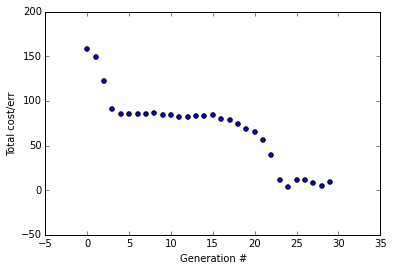

In [84]:
import matplotlib as plt, random as rn, numpy as np, NeuralNetXOR as NN
%matplotlib inline
initPop, mutRate, numGen, solLen, numWin = 80, 0.01, 30, 13, 10
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(initPop, solLen),replace=False) 
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((initPop, 2))
for i in range(numGen):
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].T))]) for x in range(initPop)])
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((numWin, solLen))
	for n in range(len(winners)):
		selected = np.random.choice(range(len(fitVec)), numWin/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners
	duplicWin = np.zeros((((initPop - len(winners))),winners.shape[1]))
	for x in range(winners.shape[1]):
		numDups = ((initPop - len(winners))/len(winners))
		duplicWin[:, x] = np.repeat(winners[:, x], numDups, axis=0)
		#duplicWin[:, x] = np.random.permutation(duplicWin[:, x]) Disabled mating process
	nextPop[len(winners):] = np.matrix(duplicWin)
	mutMatrix = [np.float(np.random.normal(0,2,1)) if rn.random() < mutRate else 1 for x in range(nextPop.size)]
	nextPop = np.multiply(nextPop, np.matrix(mutMatrix).reshape(nextPop.shape)) 
	curPop = nextPop
plt.pyplot.ylabel('Total cost/err')
plt.pyplot.xlabel('Generation #')
best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
result = np.round(NN.runForward(X, best_soln.T))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.T))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

This is a particularly interesting run (I ran it with these parameters about 8 times). It only correctly converged once (but didn't achieve the really low error rate we got in the beginning with 1% mut rate and mating enabled). The error vs. num generations graph looked quite different each time I ran it but I'm displaying this one because I think it illustrates nicely what happens when there's no mating.

At first we get a sharp drop in error; it's simply selecting for the best solutions in our first generation. Then it flattens out for awhile because we're having a really hard time improving on those initial decent solutions without mating, but eventually, due to a lucky mutation round, we get another sharp decline in error and then it flattens out again. But it's still not good enough to globally converge and solve the problem.

Clearly, the mating process is more important than the mutation process.

####Closing words...

I hope that quells any concerns about the genetic algorithm not actually doing it's evolutionary due diligence. It's also just interesting to experiment with the parameters to see how it affects the performance of the algorithm.

This is a simple genetic algorithm implementation. Natural organisms have evolved much more sophisticated ways of controlling their own evolution. "In general, the mutation rate in unicellular eukaryotes and bacteria is roughly 0.003 mutations per genome per cell generation" - <a href="https://en.wikipedia.org/wiki/Mutation_rate">Wikipedia</a>. This much lower than our 1% mutation rate, but our solution space is also much, much smaller. 

Interestingly, however, different genes in the same organism can experience different rates of mutation. In fact, some organisms <em>intentionally</em> subject particular genes to higher rates of mutation (for example, the human immune system involves hypermutating the genes of antibodies to produce higher affinity versions; a sort of evolutionary process in the cells of our own bodies that evolved from an evolutionary process). It would be a fun experiment to try to emulate this behavior in a GA by allowing a separate mutation rate for each 'gene' (element in a vector, in our case) and subjecting those mutation rates themselves to an evolutionary process. It's very unlikely this would help the GA for a simple feedforward neural network (and the overhead to implement it wouldn't be worth it) but could be useful with more complex problems.

As a former neuroscience researcher and current medical student, I'm quite fascinated by "bio-similar" algorithms like GAs and neural networks, so combining those two here has just filled me with nerd joy.

Cheers